In [2]:
# Import packages
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as  pd
import math as mt
import seaborn as sns

In [3]:
data_path='rawdata.xlsx'
DF=pd.read_excel(data_path)

In [4]:
#df = pd.DataFrame(DF, columns= ['DATE','Cash(D)'])
DF=pd.DataFrame(DF)

In [5]:
#df = df.iloc[: , :]
DF1=DF.iloc[3: ,2 :8]
DF1

,1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
3,0.0431977,0.0260299,0.13824,0.0150034,0.010966,0.00536417
4,-0.00187427,-0.0786783,-0.0678592,0.00667544,0.0102496,0.00469495
5,-0.0484658,-0.0478684,-0.0781715,0.00593854,0.00719235,0.00482099
6,0.0585453,0.0697504,0.0472875,-0.0096612,-0.00638446,0.0043502
7,0.0171577,-0.00710211,0.0226201,-0.00377142,0.00561258,0.00404969
...,...,...,...,...,...,...
242,0.0131964,0.0350668,0.0606605,-0.00272124,0.00179122,2.56511e-05
243,0.00331737,-0.00772246,0.0380541,-0.00419282,-0.00652406,1.23602e-05
244,0.0147604,0.0264729,0.0103307,-0.0358089,-0.0185919,-4.55976e-06
245,0.0229637,0.0420913,-0.00871113,0.00800359,-0.00210882,2.02679e-05


In [6]:
a=DF1
cov=a.astype(float).cov()

In [7]:
e=pd.DataFrame(np.ones(6))
e

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


In [8]:
e.T

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
#covriance matrix for 2 year
cov=24*cov
a=e.T@np.linalg.inv(cov.values)@e
a=a.values
a=float(a)
a 

17181.64746773567

In [11]:
r = DF1.mean(axis=0).values
r = 24*r
r

array([0.18017439, 0.13680483, 0.23300986, 0.10811212, 0.12642387,
       0.07625199])

In [12]:
b=r.T@np.linalg.inv(cov.values)@e.values
b=float(b)
b

1319.3013991143728

In [13]:
c=r.T@np.linalg.inv(cov.values)@r
c=float(c)

In [14]:
d=(a*c-b*b)
d

42164.615185202565

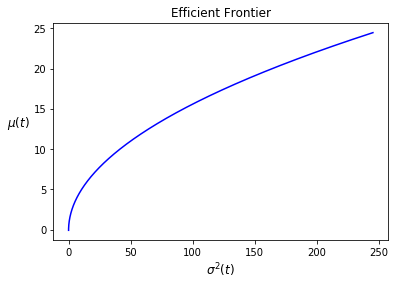

In [81]:
def eff_frontier(a,b,c,d,t):
    var = (1+d*t*t)/a
    mean = (b+d*t)/a
    mean = -mean[np.where(mean<(b/a))]
    var = var[0:len(mean)]
    plt.plot(var,mean,'-b')
    plt.title('Efficient Frontier')
    plt.xlabel('$\sigma^2(t)$',fontsize=12);plt.ylabel('$\mu(t)$',rotation=0,labelpad=15,fontsize=12)
    plt.show()
    return

t = np.linspace(-10,10,20000)
eff_frontier(a,b,c,d,t)

In [71]:
mean[np.where(mean==b/a)] #problem with this method is that we cannot identify where this coordinate is to any precision

array([], dtype=float64)

array([-24.46371055, -24.46125638, -24.45880221, ...,  24.61237321,
        24.61482738,  24.61728155])